In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data Set Information:

Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions. 

More Information can be found here:
https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

### Data Discovery

In [2]:
data_df = pd.read_csv('downloads/Live.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.3+ KB


In [4]:
data_df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Droping data 
We won't be looking the NAN columns and the Status ID and the date published at this point.

In [5]:
data_df = data_df.drop(["Column1", "Column2", "Column3","Column4","status_id","status_published"], axis=1)

Let's check again the data to make sure we were successful to drop them.

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
status_type      7050 non-null object
num_reactions    7050 non-null int64
num_comments     7050 non-null int64
num_shares       7050 non-null int64
num_likes        7050 non-null int64
num_loves        7050 non-null int64
num_wows         7050 non-null int64
num_hahas        7050 non-null int64
num_sads         7050 non-null int64
num_angrys       7050 non-null int64
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


### Check for Missing Data

In [7]:
data_df.isnull().sum()*100/data_df.isnull().count()

status_type      0.0
num_reactions    0.0
num_comments     0.0
num_shares       0.0
num_likes        0.0
num_loves        0.0
num_wows         0.0
num_hahas        0.0
num_sads         0.0
num_angrys       0.0
dtype: float64

**YES**, we do not have any missing data!

In [8]:
data_df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


The rest of the data are numerical in value. Let's check the unique values for *status_type*

In [9]:
data_df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Let's change their value to a numerical value and create a new column for it.

In [10]:
def func(row):
    if row['status_type'] == 'video':
        return 1
    elif row['status_type'] =='photo':
        return 2 
    elif row['status_type'] =='link':
        return 3 
    else:
        return 4

data_df['stat_type'] = data_df.apply(func, axis=1)

In [11]:
#Dropping duplicate data
data_df = data_df.drop(["status_type"], axis=1)

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
num_reactions    7050 non-null int64
num_comments     7050 non-null int64
num_shares       7050 non-null int64
num_likes        7050 non-null int64
num_loves        7050 non-null int64
num_wows         7050 non-null int64
num_hahas        7050 non-null int64
num_sads         7050 non-null int64
num_angrys       7050 non-null int64
stat_type        7050 non-null int64
dtypes: int64(10)
memory usage: 550.9 KB


### Checking for Outliers

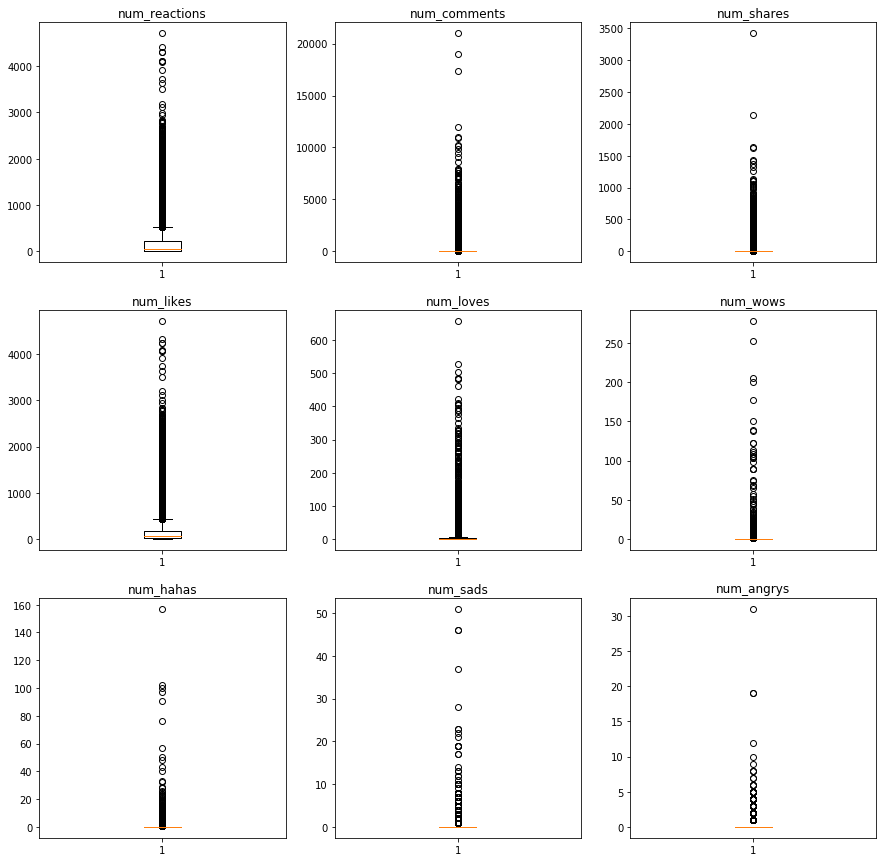

In [13]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1) 
plt.boxplot(data_df["num_reactions"]) 
plt.title("num_reactions")

plt.subplot(3,3,2)
plt.boxplot(data_df["num_comments"])
plt.title("num_comments")

plt.subplot(3,3,3)
plt.boxplot(data_df["num_shares"])
plt.title("num_shares")

plt.subplot(3,3,4) 
plt.boxplot(data_df["num_likes"]) 
plt.title("num_likes")

plt.subplot(3,3,5)
plt.boxplot(data_df["num_loves"])
plt.title("num_loves")

plt.subplot(3,3,6)
plt.boxplot(data_df["num_wows"])
plt.title("num_wows")

plt.subplot(3,3,7) 
plt.boxplot(data_df["num_hahas"]) 
plt.title("num_hahas")

plt.subplot(3,3,8)
plt.boxplot(data_df["num_sads"])
plt.title("num_sads")

plt.subplot(3,3,9)
plt.boxplot(data_df["num_angrys"])
plt.title("num_angrys")

plt.show()

In [14]:
from scipy.stats.mstats import winsorize

data_df["wnum_reactions"] = winsorized_views = winsorize(data_df["num_reactions"], (0, 0.10))
data_df["wnum_comments"] = winsorized_views = winsorize(data_df["num_comments"], (0, 0.20))
data_df["wnum_shares"] = winsorized_views = winsorize(data_df["num_shares"], (0, 0.20))
data_df["wnum_likes"] = winsorized_views = winsorize(data_df["num_likes"], (0, 0.15))
data_df["wnum_loves"] = winsorized_views = winsorize(data_df["num_loves"], (0, 0.20))
data_df["wnum_wows"] = winsorized_views = winsorize(data_df["num_wows"], (0, 0.01))
data_df["wnum_hahas"] = winsorized_views = winsorize(data_df["num_hahas"], (0, 0.001))
data_df["wnum_sads"] = winsorized_views = winsorize(data_df["num_sads"], (0, 0.001))
data_df["wnum_angrys"] = winsorized_views = winsorize(data_df["num_angrys"], (0, 0.001))

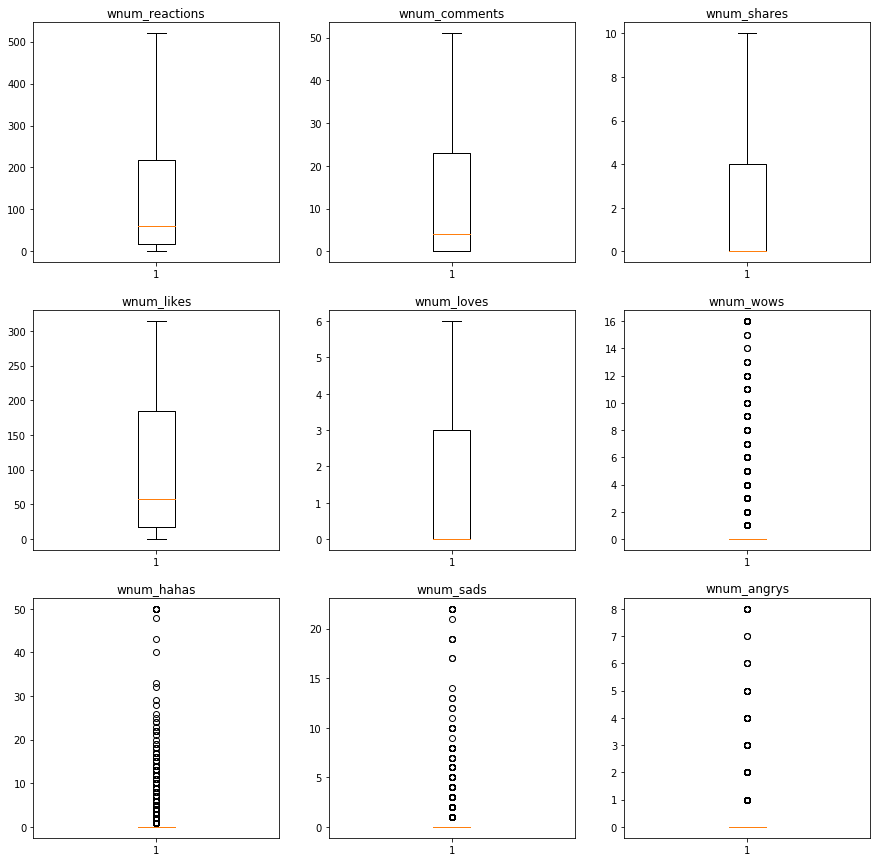

In [15]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1) 
plt.boxplot(data_df["wnum_reactions"]) 
plt.title("wnum_reactions")

plt.subplot(3,3,2)
plt.boxplot(data_df["wnum_comments"])
plt.title("wnum_comments")

plt.subplot(3,3,3)
plt.boxplot(data_df["wnum_shares"])
plt.title("wnum_shares")

plt.subplot(3,3,4) 
plt.boxplot(data_df["wnum_likes"]) 
plt.title("wnum_likes")

plt.subplot(3,3,5)
plt.boxplot(data_df["wnum_loves"])
plt.title("wnum_loves")

plt.subplot(3,3,6)
plt.boxplot(data_df["wnum_wows"])
plt.title("wnum_wows")

plt.subplot(3,3,7) 
plt.boxplot(data_df["wnum_hahas"]) 
plt.title("wnum_hahas")

plt.subplot(3,3,8)
plt.boxplot(data_df["wnum_sads"])
plt.title("wnum_sads")

plt.subplot(3,3,9)
plt.boxplot(data_df["wnum_angrys"])
plt.title("wnum_angrys")

plt.show()

In [16]:
#We'll remove the data with the most outliers. Which are WOWs, HAHAs, SADs and Angry. 
#The data we have is few and far in between.
data_df = data_df.drop(["wnum_wows","num_wows","wnum_hahas","num_hahas","wnum_sads",
                        "num_sads","wnum_angrys","num_angrys"], axis=1)


In [17]:
#We also need to remove the duplicate values that we winorized
data_df = data_df.drop(["num_reactions","num_comments","num_shares","num_likes","num_loves"], axis=1)


In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 6 columns):
stat_type         7050 non-null int64
wnum_reactions    7050 non-null int64
wnum_comments     7050 non-null int64
wnum_shares       7050 non-null int64
wnum_likes        7050 non-null int64
wnum_loves        7050 non-null int64
dtypes: int64(6)
memory usage: 330.5 KB


In [19]:
data_df = data_df.replace(0,np.nan)

In [20]:
data_df.isnull().sum()*100/data_df.isnull().count()

stat_type          0.000000
wnum_reactions     1.716312
wnum_comments     30.056738
wnum_shares       55.475177
wnum_likes         1.787234
wnum_loves        60.000000
dtype: float64

In [21]:
data_df["wnum_comments"].fillna(data_df["wnum_comments"].mean(), inplace=True)
data_df["wnum_shares"].fillna(data_df["wnum_shares"].mean(), inplace=True)
data_df["wnum_loves"].fillna(data_df["wnum_loves"].mean(), inplace=True)
data_df["wnum_reactions"].fillna(data_df["wnum_reactions"].mean(), inplace=True)
data_df["wnum_likes"].fillna(data_df["wnum_likes"].mean(), inplace=True)

In [22]:
data_df.isnull().sum()*100/data_df.isnull().count()

stat_type         0.0
wnum_reactions    0.0
wnum_comments     0.0
wnum_shares       0.0
wnum_likes        0.0
wnum_loves        0.0
dtype: float64

### Removing the Headers

In [23]:
data_df.shape[1]

6

In [24]:
data_df.columns = range(data_df.shape[1])

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 6 columns):
0    7050 non-null int64
1    7050 non-null float64
2    7050 non-null float64
3    7050 non-null float64
4    7050 non-null float64
5    7050 non-null float64
dtypes: float64(5), int64(1)
memory usage: 330.5 KB


In [26]:
data_df.head()

,0,1,2,3,4,5
0,1,520.0,51.000000,10.000000,314.0,6.000000
1,2,150.0,21.269722,5.913348,150.0,4.158865
2,1,227.0,51.000000,10.000000,204.0,6.000000
3,2,111.0,21.269722,5.913348,111.0,4.158865
4,2,213.0,21.269722,5.913348,204.0,6.000000


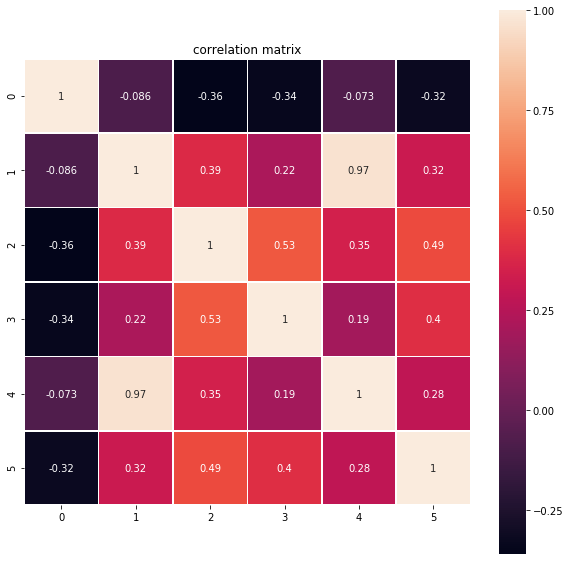

In [27]:
# make the correlation matrices.
data_cmat = data_df.corr()

plt.figure(figsize=(10,10))

# draw the heatmap using seaborn.
sns.heatmap(data_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

Not sure if you remembered out data, most of the comments and reactions are correlated to each other the type of status aren't.

In [28]:
X = data_df.iloc[:, :5]
y = data_df.iloc[:, 5]

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

### KMeans

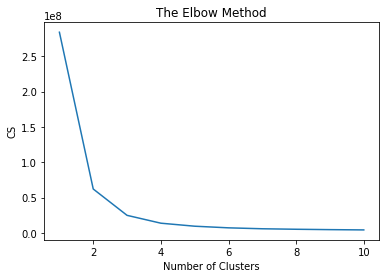

In [30]:
#Finding optimal number of Clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CS')
plt.show()

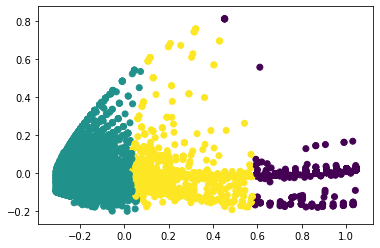

In [31]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(3).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=10).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()


In [32]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Comparing k-means clusters against the data:
5      1.000000  2.000000  3.000000  4.000000  4.158865  5.000000  6.000000
row_0                                                                      
0            45         5         0         1       792         1         1
1           458       264       204       127      2524       101      1414
2           108        13         9         3       914         6        60


### MiniBatch

In [33]:
# Each batch will be made up of 500 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=500)
minibatchkmeans.fit(X_pca)

# Predict new MiniBatch cluster memberships.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0     1    2
row_0                
0        0  5092  429
1      845     0  684


### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=24)

### Mean-Shift

In [35]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


In [36]:
X_train.shape

(4723, 5)

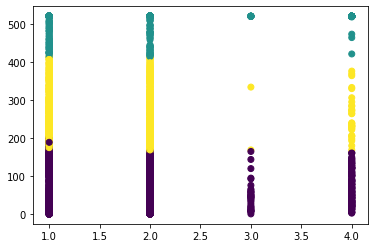

Comparing the assigned categories to the ones in the data:
col_0        0    1    2
5                       
1.000000   348    7   49
2.000000   133   10   42
3.000000    78   10   61
4.000000    32   14   48
4.158865  2388  291  146
5.000000    27   12   38
6.000000   277  230  482


In [37]:
#plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=labels)
plt.scatter(X_train.iloc[:, 0].values, X_train.iloc[:, 1].values, c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [38]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 1432


#### Relevant Papers:

Nassim Dehouche and Apiradee Wongkitrungrueng. Facebook Live as a Direct Selling Channel, 2018, Proceedings of ANZMAC 2018: The 20th Conference of the Australian and New Zealand Marketing Academy. Adelaide (Australia), 3-5 December 2018.


#### Citation Request:

Nassim Dehouche and Apiradee Wongkitrungrueng. Facebook Live as a Direct Selling Channel, 2018, Proceedings of ANZMAC 2018: The 20th Conference of the Australian and New Zealand Marketing Academy. Adelaide (Australia), 3-5 December 2018.

### Your end-user and the value your project provides to them.
This helps the end-user to recognize patterns on the cluster of data. This also recognized different defects in the dataset as we collect them. Knowing how the different data grouped together helps the users sees a pattern of how a certain video, photo or link would trend.

### The visuals you chose and what they represent for your research.
I used the elbow method to see how many clusters are there. Also used Kmean and MeanShift for visualization. 


### Next steps you'd take to expand on your work.
Would like to play more on the other data and focus on one status type (video, photo and link) at a time. This will show what the audience would engage more on.

Also want to revisite the date so we could anticipate when more drive from the users

### A specified research question your model addresses.
What makes a user react or comment on the different media they've seen or watched? Is there a pattern that we could learn from?

### How you chose your model specification and what alternatives you compared it to.
I tried different models as a trial and error to find the perfect one.

### The practical uses of your model for an audience of interest.
This would also help determine the behaviour of the viewer. We can assess pattern of how they rate a certain video, photo or link and would then we could suggest a better media for them to view.

### Any weak points or shortcomings of your model.
With the different models, we're unable to pin point any concreate data for the information is unlabled. This then may provide less accurate outputs. It is also hard to understand what each cluster means and if I want the data to lean one way I could present it to favor what output I want.
